# Import the user data

In [4]:
import csv
import pandas as pd
import matplotlib as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def load_monthly_author_data():
    '''Loads the monthly author data into a dataframe.
    Returns a dataframe consisting of entries for activity of each author in a given month.'''
    monthly_author_data = pd.DataFrame();
    for x in range(6):
        filename = '../data/author_monthly_posted_or_commented_2013_14_'+str(x)+'.csv';
        monthly_author_data = pd.concat([monthly_author_data,pd.read_csv(filename)],axis=0,ignore_index=True)
    return monthly_author_data

# Load the monthly author data

In [6]:
monthly_author_data = load_monthly_author_data()

# Create pivot table to hold number of active users for a given month, year combination

In [7]:
def authors_active_more_than_X_days(m,y,d):
    df = pd.DataFrame(monthly_author_data[(monthly_author_data['month'] == m) & (monthly_author_data['year'] == y) & (monthly_author_data['num_days'] >= d)].author)
    df = df.set_index(np.arange(df.shape[0]))
    return df

def number_authors_active_more_than_X_days(m,y,d):
    return authors_active_more_than_X_days(m,y,d).shape[0]


In [8]:
x = np.arange(1, 32);
y = [number_authors_active_more_than_X_days(1,2013,i)/1000 for i in range(1, 32)]
#z = [number_authors_active_more_than_X_days(1,2014,i) for i in range(1, 32)]

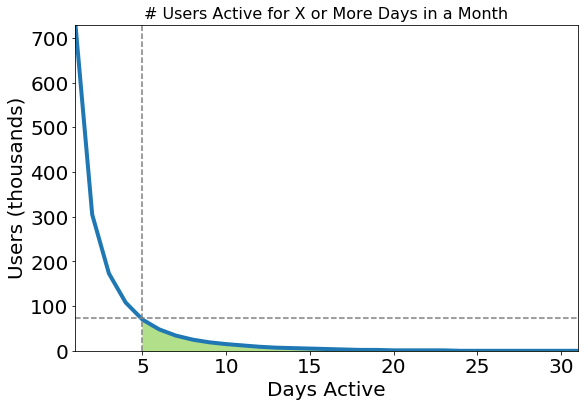

In [20]:
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 20})
plt.plot(x, y,linewidth=4,color='#1f78b4')
plt.fill_between(x,y, where=x>=5, color='#b2df8a')
plt.axvline(x=5,color='gray').set_linestyle('--')
plt.axhline(y=0.1*y[0],color='gray').set_linestyle('--')
plt.margins(0)
plt.ylabel('Users (thousands)',fontsize=20)
plt.xlabel('Days Active',fontsize=20)
plt.title('# Users Active for X or More Days in a Month',fontsize=16)

In [7]:
# Create table of the author, month, year for those meeting the active definition 

active_authors = pd.DataFrame()
for m in range(1,13):
    for y in [2013,2014]:
        tempDF = authors_active_more_than_X_days(m,y,5)
        tempDF = pd.concat([tempDF,pd.DataFrame({'month':m,'year':y},index=tempDF.index)],axis=1)
        active_authors = pd.concat([active_authors,tempDF],axis=0)
        
baseline_authors = pd.DataFrame()
for m in range(1,13):
    for y in [2013,2014]:
        tempDF = authors_active_more_than_X_days(m,y,1)
        tempDF = pd.concat([tempDF,pd.DataFrame({'month':m,'year':y},index=tempDF.index)],axis=1)
        baseline_authors = pd.concat([baseline_authors,tempDF],axis=0)

In [8]:
num_active_authors_monthly = active_authors.groupby(['month','year']).agg('count')
num_baseline_authors_monthly = baseline_authors.groupby(['month','year']).agg('count')

In [9]:
num_active_authors_monthly = num_active_authors_monthly.reset_index().sort_values(['year','month'])
num_baseline_authors_monthly = num_baseline_authors_monthly.reset_index().sort_values(['year','month'])

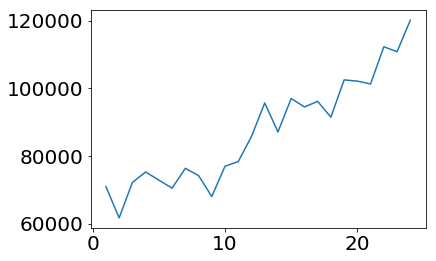

In [13]:
#plt.plot(num_active_authors_monthly_2013.month,num_active_authors_monthly_2013.author)
plt.plot(range(1,25),num_active_authors_monthly.author)

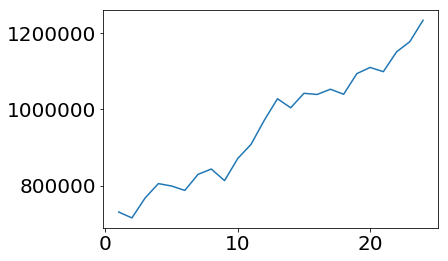

In [14]:
plt.plot(range(1,25),num_baseline_authors_monthly.author)

In [ ]:
active_authors.to_csv('active_authors.csv',index=False)